## Time Series Analysis

In [183]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [184]:
date = datetime.date(year=2013,month=6,day=7)
time = datetime.time(hour=12,minute=30,second=19,microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,hour=12, minute=30, second=19,microsecond=463198)
print("date is ", date)
print("time is", time)
print("datetime is", dt)

date is  2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


In [185]:
td = datetime.timedelta(weeks=2,days=5,hours=10,minutes=20,seconds=6.73,milliseconds=99,microseconds=8)
print(td)

19 days, 10:20:06.829008


In [186]:
#Add this timedelta to the date and datetime objects
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [187]:
#pandas timestamp
print(pd.Timestamp(year=2012, month=12, day=21, hour=5,minute=10, second=8, microsecond=99))

print(pd.Timestamp('2016/1/10'))

print(pd.Timestamp('2014-5/10'))

print(pd.Timestamp('Jan 3, 2019 20:45.56'))

print(pd.Timestamp('2016-01-05T05:34:43.123456789'))

2012-12-21 05:10:08.000099
2016-01-10 00:00:00
2014-05-10 00:00:00
2019-01-03 20:45:33
2016-01-05 05:34:43.123456789


In [188]:
#Pandas to_datetime
print(pd.to_datetime('2015-5-13'))

print(pd.to_datetime('2015-13-5', dayfirst=True))

print(pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',format='Start Date: %b %d, %Y Start Time: %I:%M %p'))

print(pd.to_datetime(100, unit='D', origin='2013-1-1'))



2015-05-13 00:00:00
2015-05-13 00:00:00
2017-09-30 13:30:00
2013-04-11 00:00:00


In [189]:
s = pd.Series([10,100,1000,10000])
print(s)
s = pd.to_datetime(s,unit='D')
print(s)

0       10
1      100
2     1000
3    10000
dtype: int64
0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]


In [190]:
data_path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
data_path = data_path + 'crime.h5'
crime = pd.read_hdf(data_path,'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [191]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [192]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
GEO_LON,457296.0,-104.949973,1.243537,-105.300593,-105.009524,-104.982722,-104.929727,-0.000002
GEO_LAT,457296.0,39.726061,0.471636,0.000001,39.706890,39.739285,39.757689,39.904311
IS_CRIME,460911.0,0.728668,0.444648,0.000000,0.000000,1.000000,1.000000,1.000000
IS_TRAFFIC,460911.0,0.271855,0.444916,0.000000,0.000000,0.000000,1.000000,1.000000


In [193]:
crime['IS_CRIME'] = crime['IS_CRIME'].astype('int8')
crime['IS_TRAFFIC'] = crime['IS_TRAFFIC'].astype('int8')

In [194]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int8
IS_TRAFFIC             460911 non-null int8
dtypes: category(3), datetime64[ns](1), float64(2), int8(2)
memory usage: 16.7 MB


In [195]:
crime.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            460901, 460902, 460903, 460904, 460905, 460906, 460907, 460908,
            460909, 460910],
           dtype='int64', length=460911)

In [196]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [197]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460911 entries, 2014-06-29 02:01:00 to 2017-09-12 09:30:00
Data columns (total 7 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int8
IS_TRAFFIC             460911 non-null int8
dtypes: category(3), float64(2), int8(2)
memory usage: 13.2 MB


In [198]:
#select rows
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [199]:
crime.loc['2016-05-12'][::20]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 09:10:00,traffic-accident,traffic-accident,-104.943955,39.703761,belcaro,0,1
2016-05-12 09:42:00,traffic-accident,traffic-accident,-104.902747,39.761965,stapleton,0,1
2016-05-12 11:57:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.893950,39.683418,indian-creek,1,0
2016-05-12 06:51:00,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.961388,39.710275,washington-park,1,0
2016-05-12 16:19:00,traffic-accident,traffic-accident,-104.940507,39.780085,northeast-park-hill,0,1
2016-05-12 12:31:00,criminal-mischief-mtr-veh,public-disorder,-105.019005,39.779834,sunnyside,1,0
2016-05-12 15:52:00,traffic-accident-hit-and-run,traffic-accident,-105.041710,39.676804,harvey-park,0,1
2016-05-12 18:01:00,disturbing-the-peace,public-disorder,-104.750092,39.778058,gateway-green-valley-ranch,1,0


In [200]:
#select by month and year
crime.loc['2016-05'].shape

(8012, 7)

In [201]:
#slice by dates
crime.loc['2015-3-4':'2016-1-1'].sort_index().shape

(75403, 7)

In [202]:
#looking at the index
crime.index[:4]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00',
               '2014-06-29 02:00:00', '2014-06-29 02:18:00'],
              dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

In [203]:
#performance gain from sorting
%timeit crime.loc['2015-3-4':'2016-1-1']

28.8 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [204]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

950 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Using methods that only work with a DatetimeIndex

In [205]:
data_path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
data_path = data_path + 'crime.h5'
crime = pd.read_hdf(data_path,'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [206]:
crime.between_time('2:00','5:00',include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [207]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [208]:
#first six months of crime data
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))[-5:]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1
2012-07-01 00:01:00,robbery-street,robbery,-104.924292,39.767585,northeast-park-hill,1,0


In [209]:
crime_sort.loc[:'2012-06'][-5:]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0
2012-06-30 23:54:00,traffic-accident-hit-and-run,traffic-accident,-105.014162,39.740439,lincoln-park,0,1


### Counting the number of weekly crimes
The raw Denver crime dataset is huge with over 460,000 rows each marked with a reported
date. Counting the number of weekly crimes is one of many queries that can be answered
by grouping according to some period of time. The resample method provides an easy
interface to grouping by any possible span of time

In [210]:
crime = pd.read_hdf(data_path,'crime').set_index('REPORTED_DATE').sort_index()

In [211]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In order to count the number of crimes per week, we need to form a group for
each week. The resample method takes a DateOffset object or alias and returns
an object ready to perform an action on all groups. The object returned from the
resample method is very similar to the object produced after calling the
groupby method:

In [212]:
crime_sort.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [213]:
#chain the size method to count the number of weekly crimes:
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()


REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

now have the weekly crime count as a Series with the new index
incrementing one week at a time. There are a few things that happen by default
that are very important to understand. Sunday is chosen as the last day of the
week and is also the date used to label each element in the resulting Series. For
instance, the first index value January 8, 2012 is a Sunday. There were 877 crimes
committed during that week ending on the 8th. The week of Monday, January
9th to Sunday, January 15th recorded 1,071 crimes

In [214]:
#different day to end the week besides Sunday with an anchored offset:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

Nearly all the functionality of resample may be reproduced by the groupby method. The only difference is that you must pass the offset in the pd.Grouper object:

In [215]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [216]:
type(weekly_crimes_gby)

pandas.core.series.Series

In [217]:
#resample methods
r = crime_sort.resample('W')
res = [attr for attr in dir(r) if attr[0].islower()]

print(res)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'plot', 'prod', 'sem', 'size', 'std', 'sum', 'transform', 'var']


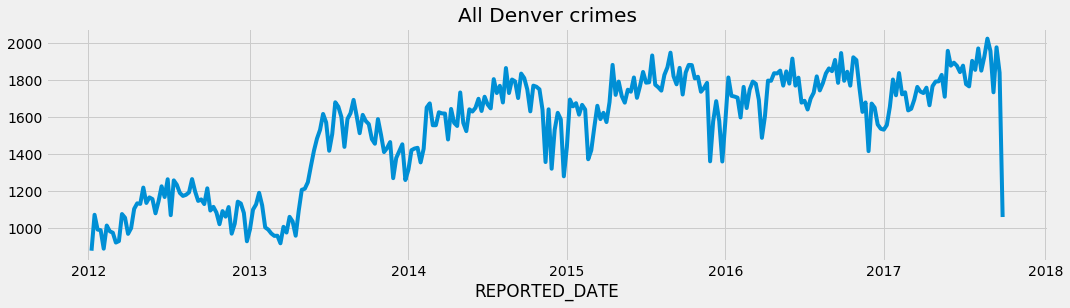

In [218]:
weekly_crimes.plot(figsize=(16,4),title='All Denver crimes')

### Aggregating weekly crime and traffic accidents separately
The Denver crime dataset has all crime and traffic accidents together in one table, and
separates them through the binary columns, IS_CRIME and IS_TRAFFIC. The resample
method allows you to group by a period of time and aggregate specific columns separately.

In [219]:
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [220]:
#resample method to group by each quarter of the year and then sum the IS_CRIME and IS_TRAFFIC columns for each group:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [221]:
#use start of the quarter
crime_sort.resample('QS')['IS_CRIME','IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [222]:
#could replicate using groupby
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q'))['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.equals(crime_quarterly2)

True

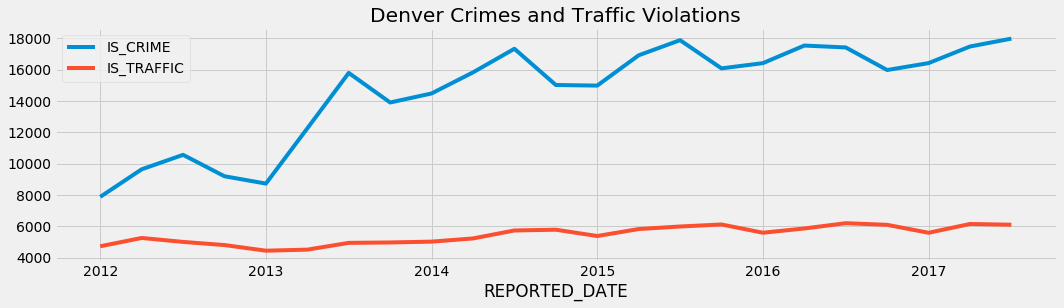

In [223]:
#make a plot to better analyze the trends in crime and traffic accidents over time
plot_kwargs = dict(figsize=(16,4),title='Denver Crimes and Traffic Violations')
crime_quarterly.plot(**plot_kwargs);

In [224]:
#plot the percentage increase in crime and traffic, instead of the raw count. Let's divide all the data by 
#the first row and plot again:
crime_begin = crime_quarterly.iloc[0]
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

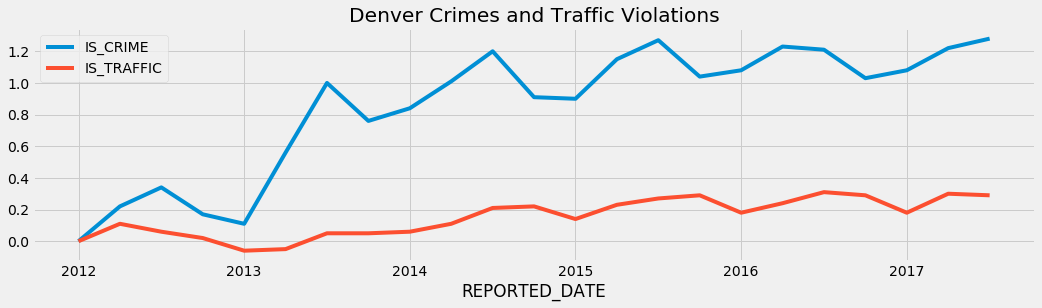

In [225]:
crime_quarterly.div(crime_begin).sub(1).round(2).plot(**plot_kwargs);

In [226]:
crime_quarterly['IS_CRIME'][-1]/crime_quarterly['IS_CRIME'][0]

2.282415630550622

In [227]:
crime_quarterly.div(crime_begin)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,1.000000,1.000000
2012-06-30,1.223167,1.111934
2012-09-30,1.340523,1.058612
2012-12-31,1.166836,1.016081
2013-03-31,1.107587,0.939907
2013-06-30,1.555316,0.954295
2013-09-30,2.004440,1.045705
2013-12-31,1.764781,1.051206
2014-03-31,1.837985,1.062421


### Measuring crime by weekday and year
Use the dt accessor to provide us with both the weekday name and
year of each crime as a Series. We count all of the crimes by forming groups using both of
these Series. Finally, we adjust the data to consider partial years and population before
creating a heatmap of the total amount of crime.

In [228]:
crime = pd.read_hdf(data_path,'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


All Timestamp columns have a special attribute called the dt accessor, which
gives access to a variety of extra attributes and methods specifically designed for
them. Let's find the weekday name of each REPORTED_DATE and then count these
values:

In [229]:
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

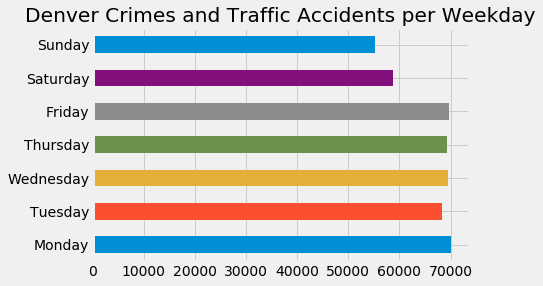

In [230]:
#seems less problems on weekend
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh',title=title);

In [231]:
wd_counts.reindex(days)
wd_counts.index

Index(['Monday', 'Friday', 'Wednesday', 'Thursday', 'Tuesday', 'Saturday',
       'Sunday'],
      dtype='object')

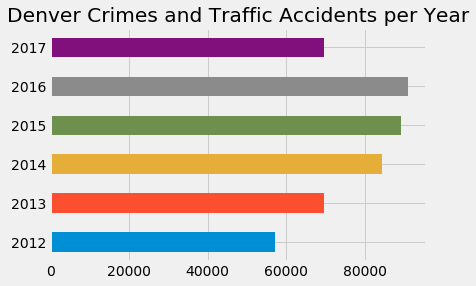

In [232]:
#repeat by year
title = 'Denver Crimes and Traffic Accidents per Year'
crime['REPORTED_DATE'].dt.year.value_counts().sort_index().plot(kind='barh',title=title);

Need to group by both weekday and year. One way of doing this is saving the
weekday and year Series to separate variables and then using these variables
with the groupby method

In [233]:
weekday = crime['REPORTED_DATE'].dt.weekday_name
print(weekday.value_counts())
year = crime['REPORTED_DATE'].dt.year
print(year.value_counts())

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64
2016    91076
2015    89148
2014    84421
2017    69702
2013    69527
2012    57037
Name: REPORTED_DATE, dtype: int64


In [234]:
crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [235]:
#clean up the structure - use unstack
crime_table = crime_wd_y.rename_axis(['Year','Weekday']).unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


2017 numbers are incomplete. To help make a fairer comparison, we can make a
simple linear extrapolation to estimate the final number of crimes. Let's first find
the last day that we have data for in 2017

In [236]:
#boolean
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria,'REPORTED_DATE'].dt.dayofyear.max()

272

A naive estimate would be to assume a constant rate of crime throughout the year
and simply multiply all values in the 2017 table by 365/272. However, we can do
a little better and look at our historical data and calculate the average percentage
of crimes that have taken place through the first 272 days of the year

In [237]:
round(272/365,3)

0.745

In [238]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272).groupby(year).mean().round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [239]:
crime_pct.loc[2012:2016].median()

0.748

the percentage of crimes that
happen during the first 272 days of the year is almost exactly proportional to the
percentage of days passed in the year. Let's now update the row for 2017 and
change the column order to match the weekday order

In [240]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,14274,14221,11382,10860,14097,14208,14139


In [241]:
crime_table = crime_table.reindex(columns=days)
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


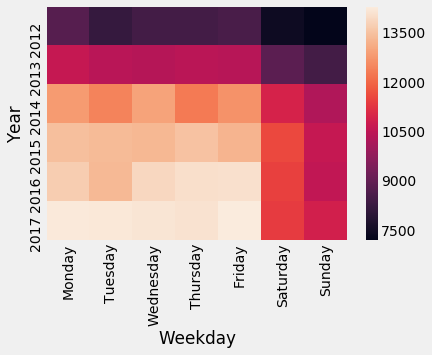

In [242]:
sns.heatmap(crime_table);

In [243]:
#Crime seems to be rising every year but this data does not account for rising population
data_path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'
data_path = data_path + 'denver_pop.csv'
denver_pop = pd.read_csv(data_path)
denver_pop

,Year,Population
0,2017,705000
1,2016,693000
2,2015,680000
3,2014,662000
4,2013,647000
5,2012,634000


Many crime metrics are reported as rates per 100,000 residents. Let's divide the
population by 100,000 and then divide the raw crime counts by this number to
get the crime rate per 100,000 residents

In [244]:
den_100k = denver_pop.div(100000).squeeze()
den_100k

,Year,Population
0,0.02017,7.05
1,0.02016,6.93
2,0.02015,6.80
3,0.02014,6.62
4,0.02013,6.47
5,0.02012,6.34


In [245]:
#this does not work!!
crime_table2 = crime_table.div(den_100k, axis='index')
crime_table2

,Friday,Monday,Population,Saturday,Sunday,Thursday,Tuesday,Wednesday,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
